In [8]:
import pandas as pd
from scipy.stats import zscore
import matplotlib.pyplot as plt

In [9]:
# Carregar os dados dos arquivos CSV
df_dolar = pd.read_csv('../Arquivos/dolar-2023-03-21.csv')
df_euro = pd.read_csv('../Arquivos/euro.csv')

In [10]:
# Converter a coluna de data para o tipo datetime e definir como índice
df_dolar['Data'] = pd.to_datetime(df_dolar['Data'])
df_euro['Data'] = pd.to_datetime(df_euro['Data'])
df_dolar.set_index('Data', inplace=True)
df_euro.set_index('Data', inplace=True)

In [11]:
# Calcular o Z-score para cada ativo
df_dolar['Z-score'] = zscore(df_dolar['Valor'])
df_euro['Z-score'] = zscore(df_euro['Valor'])

# Cálculo da diferença
df_diff = (df_dolar['Z-score'] - df_euro['Z-score'])

# Identificação de anomalias
# df_diff['Z-score'] = zscore(df_diff)

# Suponha que 'df_diff' é o seu DataFrame e 'Z-score' é uma coluna nele
# Primeiro, crie a máscara booleana com a condição desejada
anomalias = df_diff[abs(df_diff) > 2]

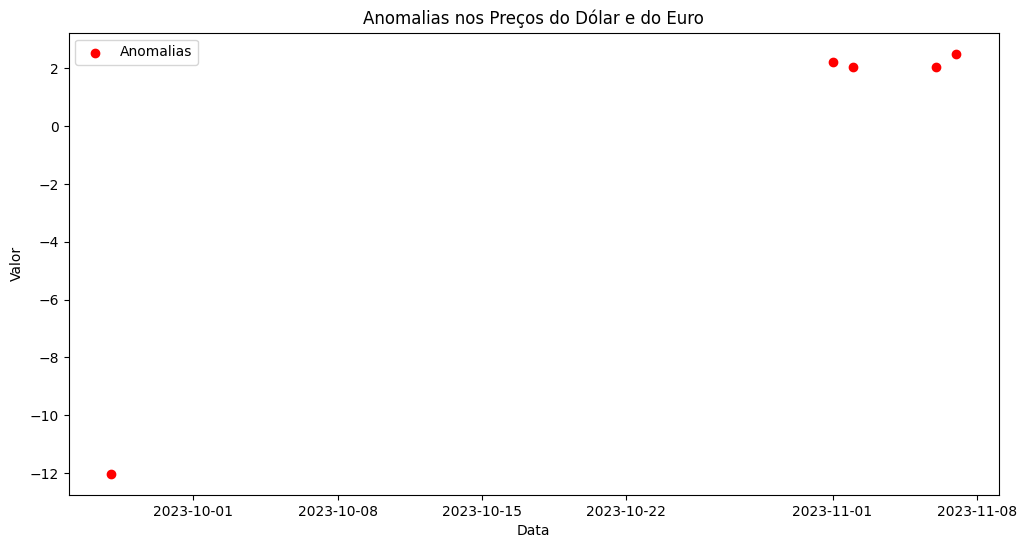

In [12]:
# Visualização
plt.figure(figsize=(12, 6))
plt.scatter(anomalias.index, anomalias, color=['red'], label='Anomalias')

plt.xlabel('Data')
plt.ylabel('Valor')
plt.title('Anomalias nos Preços do Dólar e do Euro')
plt.legend()
plt.show()